In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [90]:
data = pd.read_csv(r'uk_universities.csv')

In [91]:
data.head()

,Название университета,Регион,Год основания,Девиз,Национальный ранг,Мировой рейтинг,Оценка мировых рейтингов,Minimum_IELTS_score,Иностранные студенты,Оценка студентов,Кол-во поступивших студентов (тыс.),Кол-во преподавательского состава,Тип управления университета,Местоположение кампуса,Стоимость жизни в год,Широта,Долгота
0,University of Cambridge,East of England,1209,"From here, light and sacred draughts",1,4,94.1,6.5,20.20%,85.50%,20,5000.0,Public,Urban,12000,52.2054,0.1132
1,University of Oxford,South East England,1096,The Lord is my light,2,2,93.3,6.5,16.80%,86.50%,25,5000.0,Public,Urban,11500,51.7548,-1.2544
2,University of St Andrews,Scotland,1413,Ever to excel,3,86,75.8,6.5,40.40%,87.90%,10,1500.0,Public,Suburban,12000,56.3417,-2.7943
3,Imperial College London,London,1907,Knowledge is the adornment and safeguard of th...,4,8,86.6,6.5,41.40%,77.90%,15,4000.0,Public,Urban,10700,51.4988,-0.1749
4,Loughborough University,East Midlands,1966,"With Truth, Knowledge and Labour",5,404,72.8,5.5,22.00%,85.80%,15,1500.0,Public,Suburban,9398,52.7650,-1.2321


In [92]:
data.shape

(126, 17)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Название университета                126 non-null    object 
 1   Регион                               126 non-null    object 
 2   Год основания                        126 non-null    int64  
 3   Девиз                                112 non-null    object 
 4   Национальный ранг                    126 non-null    int64  
 5   Мировой рейтинг                      126 non-null    int64  
 6   Оценка мировых рейтингов             82 non-null     float64
 7   Minimum_IELTS_score                  126 non-null    float64
 8   Иностранные студенты                 126 non-null    object 
 9   Оценка студентов                     126 non-null    object 
 10  Кол-во поступивших студентов (тыс.)  126 non-null    int64  
 11  Кол-во преподавательского состав

In [94]:
data.isnull().sum()

Название университета                   0
Регион                                  0
Год основания                           0
Девиз                                  14
Национальный ранг                       0
Мировой рейтинг                         0
Оценка мировых рейтингов               44
Minimum_IELTS_score                     0
Иностранные студенты                    0
Оценка студентов                        0
Кол-во поступивших студентов (тыс.)     0
Кол-во преподавательского состава       0
Тип управления университета             0
Местоположение кампуса                 17
Стоимость жизни в год                   0
Широта                                  0
Долгота                                 0
dtype: int64

In [95]:
data.select_dtypes(include=[np.number]).columns.tolist()

['Год основания',
 'Национальный ранг',
 'Мировой рейтинг',
 'Оценка мировых рейтингов',
 'Minimum_IELTS_score',
 'Кол-во поступивших студентов (тыс.)',
 'Кол-во преподавательского состава',
 'Стоимость жизни в год',
 'Широта']

In [96]:
# Выберем числовые колонки с пропущенными значениями
num_cols = []
total_count = len(data)  # Общее количество записей

# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count > 0 and (dt.startswith('int') or dt.startswith('float') or dt == 'number'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print(f'Колонка {col}. Тип данных {dt}. Количество пустых значений {temp_null_count}, {temp_perc}%.')
        
num_cols

Колонка Оценка мировых рейтингов. Тип данных float64. Количество пустых значений 44, 34.92%.


['Оценка мировых рейтингов']

In [97]:
chosen_col = num_cols[0]
chosen_col

'Оценка мировых рейтингов'

In [98]:
from scipy.stats import skew
# Убираем NaN перед расчетом skewness
col_data = data[chosen_col].dropna()
# Коэффициент асимметрии
skewness = skew(col_data)
print(f"Коэффициент асимметрии (skewness) для {chosen_col}: {skewness:.3f}")

Коэффициент асимметрии (skewness) для Оценка мировых рейтингов: 0.965


In [99]:
# 2. Визуализация распределения
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Гистограмма признака Оценка мировых рейтингов')

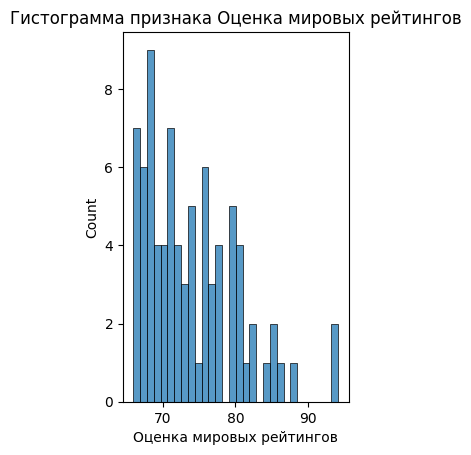

In [100]:
# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(col_data, kde=False, bins=30)
plt.title(f"Гистограмма признака {chosen_col}")

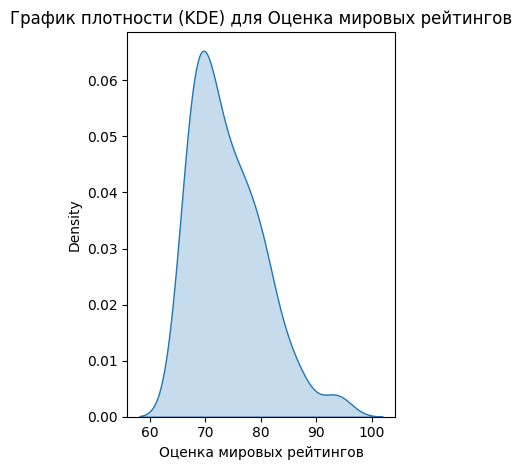

In [101]:
 # KDE-график (плотность распределения)
plt.subplot(1, 2, 2)
sns.kdeplot(col_data, fill=True)
plt.title(f"График плотности (KDE) для {chosen_col}")

plt.tight_layout()
plt.show()

In [102]:
# Функция для заполнения пропусков "хвостом распределения"
def impute_with_tail(dataset, column):
    """
    Заполняет пропуски в числовом признаке значением "хвоста распределения"
    """
    # Вычисляем параметры для "хвоста распределения" (метод IQR)
    # Подход для асимметричного распределения:
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    extreme_value = Q3 + 3 * IQR  # Используем 3*IQR для выделения выбросов

    print(f"Для '{column}': Q1={Q1}, Q3={Q3}, IQR={IQR}, Extreme Value={extreme_value}")

    # Заполняем пропуски этим значением
    imputer = SimpleImputer(strategy='constant', fill_value=extreme_value)
    dataset[column] = imputer.fit_transform(dataset[[column]])

    return dataset

Для 'Оценка мировых рейтингов': Q1=68.725, Q3=77.7, IQR=8.975000000000009, Extreme Value=104.62500000000003


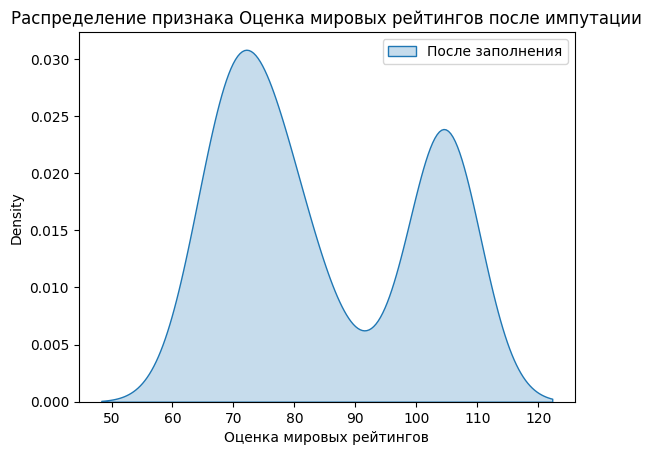

In [104]:
# Заполняем пропуски "хвостом распределения"
data = impute_with_tail(data, chosen_col)

# Визуализируем результат
sns.kdeplot(data[chosen_col], fill=True, label="После заполнения")
plt.title(f"Распределение признака {chosen_col} после импутации")
plt.legend()
plt.show()

In [105]:
data.isnull().sum()

Название университета                   0
Регион                                  0
Год основания                           0
Девиз                                  14
Национальный ранг                       0
Мировой рейтинг                         0
Оценка мировых рейтингов                0
Minimum_IELTS_score                     0
Иностранные студенты                    0
Оценка студентов                        0
Кол-во поступивших студентов (тыс.)     0
Кол-во преподавательского состава       0
Тип управления университета             0
Местоположение кампуса                 17
Стоимость жизни в год                   0
Широта                                  0
Долгота                                 0
dtype: int64

In [106]:
data.shape

(126, 17)

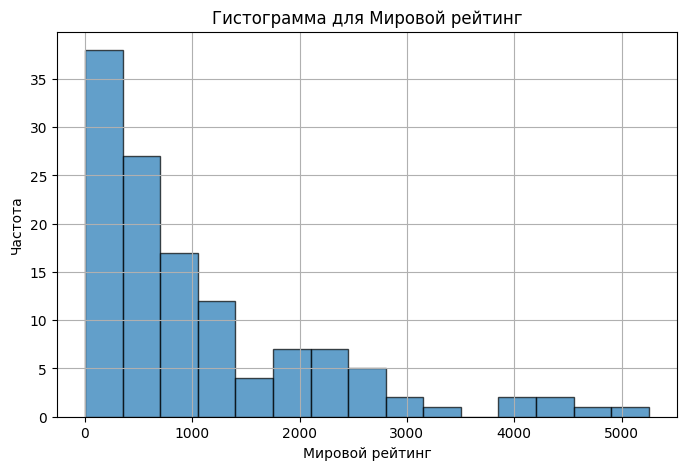

In [108]:
# Выбор столбца
column_name = "Мировой рейтинг"

# Построение гистограммы
plt.figure(figsize=(8, 5))
plt.hist(data[column_name].dropna(), bins=15, edgecolor="black", alpha=0.7)
plt.xlabel(column_name)
plt.ylabel("Частота")
plt.title(f"Гистограмма для {column_name}")
plt.grid(True)
plt.show()


In [182]:
from sklearn.feature_selection import VarianceThreshold

# Генерация данных с целыми числами
np.random.seed(42)

# 1. Константный признак (все значения = 1)
constant_feature = np.ones(100, dtype=int)

# 2. Псевдоконстантный признак (95% значений = 5, 5% = 6)
pseudo_constant = np.array([5] * 95 + [6] * 5, dtype=int)
np.random.shuffle(pseudo_constant)  # Перемешиваем

# 3. Нормальные признаки с высокой дисперсией
feature_3 = np.random.randint(0, 5, size=100)  # Случайные целые от 0 до 99
feature_4 = np.random.randint(0, 2, size=100)    # Бинарный признак (0 или 1)
feature_5 = np.random.randint(1, 10, size=100)   # Целевой признак (1-9)

# Создаем DataFrame
df = pd.DataFrame({
    'feature_1': constant_feature,
    'feature_2': pseudo_constant,
    'feature_3': feature_3,
    'feature_4': feature_4,
    'feature_5': feature_5
})

# Вывод первых нескольких строк
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1,5,2,1,1
1,1,5,0,1,8
2,1,5,2,0,4
3,1,5,2,1,6
4,1,5,0,1,8


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   feature_1  100 non-null    int32
 1   feature_2  100 non-null    int32
 2   feature_3  100 non-null    int32
 3   feature_4  100 non-null    int32
 4   feature_5  100 non-null    int32
dtypes: int32(5)
memory usage: 2.1 KB


In [184]:
# Применение VarianceThreshold для удаления признаков с низкой дисперсией
selector = VarianceThreshold(threshold=0.15)
selector.fit(df)

VarianceThreshold(threshold=0.15)

In [185]:
# Вывод значений дисперсий для каждого признака
# Значения дисперсий для каждого признака
# Выводим дисперсии в читаемом формате
print("\nДисперсии признаков:")
for col, var in zip(df.columns, selector.variances_):
    # Форматируем вывод: 8 знаков после точки, без экспоненты
    formatted_var = f"{var:.8f}".rstrip('0').rstrip('.') if var != 0 else "0.0"
    print(f"{col}: {formatted_var}")


Дисперсии признаков:
feature_1: 0.0
feature_2: 0.0475
feature_3: 2.0344
feature_4: 0.2484
feature_5: 6.9139


In [186]:
# Преобразование и создание нового DataFrame с оставшимися признаками
df_selected = pd.DataFrame(selector.transform(df), columns=df.columns[selector.get_support()])

In [187]:
df_selected.head()

,feature_3,feature_4,feature_5
0,2,1,1
1,0,1,8
2,2,0,4
3,2,1,6
4,0,1,8
